<a href="https://colab.research.google.com/github/Achiever-caleb/Student_Performance_Predictor/blob/main/Student_Performance_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STUDENT PERFORMANCE PREDICTOR


## About Data

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).


##Data Dictionary

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:  
1.  school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)  
2.  sex - student's sex (binary: 'F' - female or 'M' - male)  
3. age - student's age (numeric: from 15 to 22)  
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)  
5.  famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

## Data Wrangling


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_mat = pd.read_csv('student-mat.csv', sep=";")
df_por = pd.read_csv('student-por.csv', sep=";")

In [5]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

So we have 395 entries for the maths Column and about 649 entries for the portugese entries. It is also clear that we have zero null entries and the column names are quite short and well labelled. the datatype for each columns seems to be correct and the dataswt appears clean.

In [9]:
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
df_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


##Data Visualization

For data visualization, our priority will be to understand our dependent variable better which in this case is our G3  whichich is the final grade, so as to see the distributions we have.

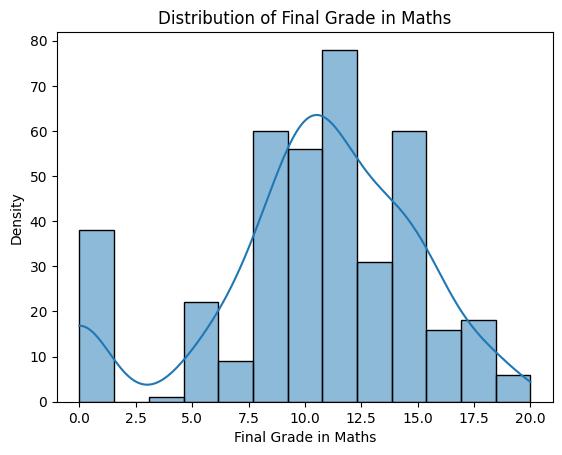

In [11]:
sns.histplot(df_mat['G3'], kde=True)
plt.xlabel('Final Grade in Maths')
plt.ylabel('Density')
plt.title('Distribution of Final Grade in Maths')
plt.show()

From the graph we can see that the data follows a normal distribution sice the data seems to be symmetrically distributed around the central value.

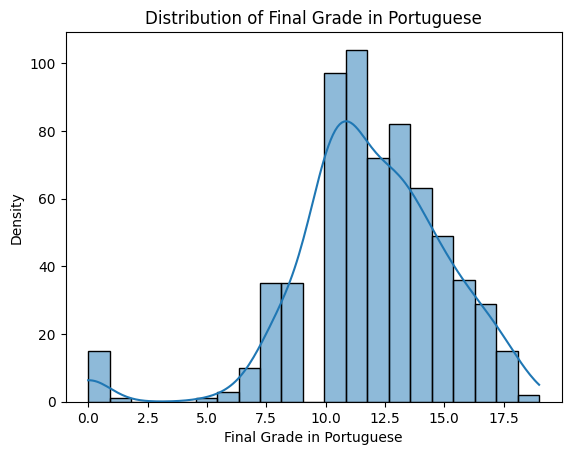

In [12]:
sns.histplot(df_por['G3'], kde=True)
plt.xlabel('Final Grade in Portuguese')
plt.ylabel('Density')
plt.title('Distribution of Final Grade in Portuguese')
plt.show()

Unlike the mathematics data that follows a gaussian distribution, this one is left skewed, since majority of the data are clustered to the right hand part of the graph.

## Data Preprocessing

We create a function to apply label encoding to binary categorical columns and one-hot encoding to multi-class categorical columns in the dataframes `df_mat` and `df_por`.

We begin by Identifying the binary and multi-class categorical columns in both `df_mat` and `df_por`.


In [13]:
binary_cols = []
multiclass_cols = []

for col in df_mat.columns:
    if df_mat[col].dtype == 'object':
        if df_mat[col].nunique() == 2:
            if col not in binary_cols:
                binary_cols.append(col)
        else:
            if col not in multiclass_cols:
                multiclass_cols.append(col)

for col in df_por.columns:
    if df_por[col].dtype == 'object':
        if df_por[col].nunique() == 2:
            if col in binary_cols: # Only keep binary columns present in both dataframes
                pass
            else:
                if col in multiclass_cols: # If a column is binary in one df and multiclass in another, treat as multiclass
                    binary_cols = [item for item in binary_cols if item != col]
                else:
                    pass
        else:
            if col in multiclass_cols: # Only keep multiclass columns present in both dataframes
                pass
            else:
                if col in binary_cols: # If a column is multiclass in one df and binary in another, treat as multiclass
                    binary_cols = [item for item in binary_cols if item != col]
                    multiclass_cols.append(col)
                else:
                    multiclass_cols.append(col)

# Remove columns from multiclass_cols if they are in binary_cols
multiclass_cols = [col for col in multiclass_cols if col not in binary_cols]

print("Binary columns:", binary_cols)
print("Multi-class columns:", multiclass_cols)

Binary columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Multi-class columns: ['Mjob', 'Fjob', 'reason', 'guardian']


We now create a function that applies label encoding to binary columns and one-hot encoding to multi-class columns for a given dataframe.


In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def preprocess_data(df):
    binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
    multiclass_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

    for col in binary_cols:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

    df = pd.get_dummies(df, columns=multiclass_cols, dummy_na=False)

    return df

## Preprocess dataframes

We apply the encoding function to both `df_mat` and `df_por`.


In [15]:
df_mat_encoded = preprocess_data(df_mat.copy())
df_por_encoded = preprocess_data(df_por.copy())
display(df_mat_encoded.head())
display(df_por_encoded.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,False,False,True,True,False,False,False,False,True,False
1,0,0,17,1,0,1,1,1,1,2,...,True,False,False,True,False,False,False,True,False,False
2,0,0,15,1,1,1,1,1,1,2,...,True,False,False,False,False,True,False,False,True,False
3,0,0,15,1,0,1,4,2,1,3,...,False,True,False,False,True,False,False,False,True,False
4,0,0,16,1,0,1,3,3,1,2,...,True,False,False,False,True,False,False,True,False,False


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,False,False,True,True,False,False,False,False,True,False
1,0,0,17,1,0,1,1,1,1,2,...,True,False,False,True,False,False,False,True,False,False
2,0,0,15,1,1,1,1,1,1,2,...,True,False,False,False,False,True,False,False,True,False
3,0,0,15,1,0,1,4,2,1,3,...,False,True,False,False,True,False,False,False,True,False
4,0,0,16,1,0,1,3,3,1,2,...,True,False,False,False,True,False,False,True,False,False


We now proceed to concatenate the preprocessed numerical and encoded categorical columns for each dataframe.


In [16]:
numerical_cols_mat = df_mat.select_dtypes(include=np.number).columns.tolist()
numerical_cols_por = df_por.select_dtypes(include=np.number).columns.tolist()

df_mat_numerical = df_mat[numerical_cols_mat]
df_por_numerical = df_por[numerical_cols_por]

encoded_cols_mat = df_mat_encoded.columns.difference(numerical_cols_mat).tolist()
encoded_cols_por = df_por_encoded.columns.difference(numerical_cols_por).tolist()

df_mat_encoded_categorical = df_mat_encoded[encoded_cols_mat]
df_por_encoded_categorical = df_por_encoded[encoded_cols_por]

df_mat_processed = pd.concat([df_mat_numerical, df_mat_encoded_categorical], axis=1)
df_por_processed = pd.concat([df_por_numerical, df_por_encoded_categorical], axis=1)

display(df_mat_processed.head())
display(df_por_processed.head())

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,nursery,paid,reason_course,reason_home,reason_other,reason_reputation,romantic,school,schoolsup,sex
0,18,4,4,2,2,0,4,3,4,1,...,1,0,True,False,False,False,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,True,False,False,False,0,0,0,0
2,15,1,1,1,2,3,4,3,2,2,...,1,1,False,False,True,False,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,1,False,True,False,False,1,0,0,0
4,16,3,3,1,2,0,4,3,2,1,...,1,1,False,True,False,False,0,0,0,0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,nursery,paid,reason_course,reason_home,reason_other,reason_reputation,romantic,school,schoolsup,sex
0,18,4,4,2,2,0,4,3,4,1,...,1,0,True,False,False,False,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,True,False,False,False,0,0,0,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,False,False,True,False,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,False,True,False,False,1,0,0,0
4,16,3,3,1,2,0,4,3,2,1,...,1,0,False,True,False,False,0,0,0,0


## Summary:

### Data Analysis Key Findings
* The binary categorical columns identified in both dataframes are 'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', and 'romantic'.
* The multi-class categorical columns identified in both dataframes are 'Mjob', 'Fjob', 'reason', and 'guardian'.
* A function `preprocess_data` was created to apply label encoding to the identified binary columns and one-hot encoding to the identified multi-class columns.
* The `preprocess_data` function was successfully applied to both `df_mat` and `df_por`, creating `df_mat_encoded` and `df_por_encoded`.
* The numerical columns from the original dataframes were combined with the encoded categorical columns to create the final preprocessed dataframes, `df_mat_processed` and `df_por_processed`, each containing 46 columns.



## Data Exploration: Correlation Analysis

We will now explore the correlations between the encoded features and the target variable ('G3') for both `df_mat_processed` and `df_por_processed`.

Correlations with G3 in df_mat_processed:


,G3
G3,1.000000
G2,0.904868
G1,0.801468
Medu,0.217147
higher,0.182465
Fedu,0.152457
Mjob_health,0.116158
address,0.105756
sex,0.103456
paid,0.101996


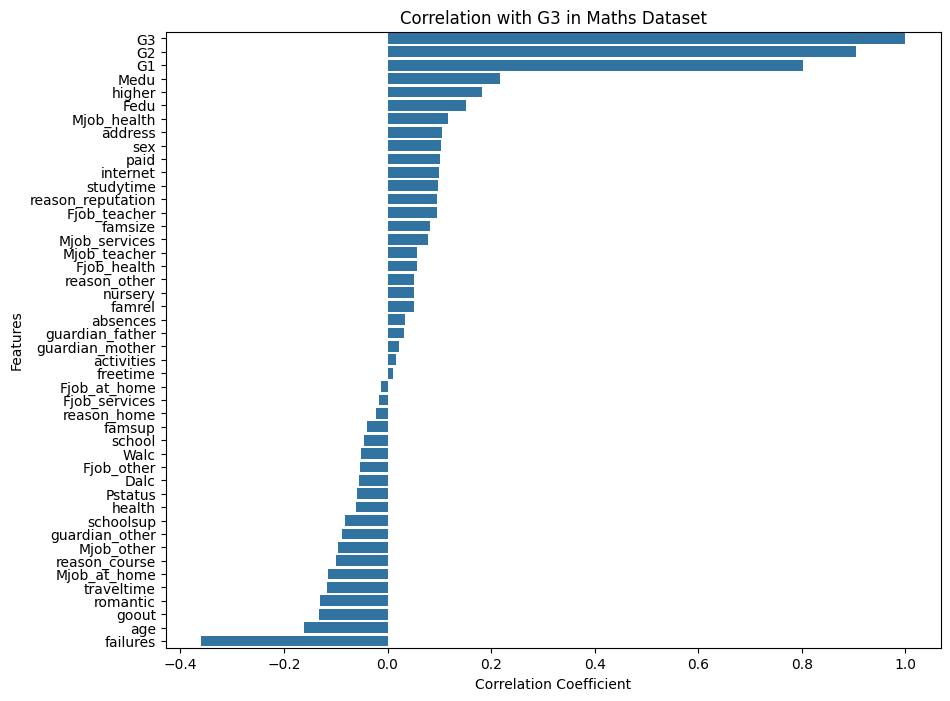

In [17]:
# Calculate the correlation matrix for df_mat_processed
correlation_matrix_mat = df_mat_processed.corr()

# Get the correlations with the target variable 'G3'
correlations_with_g3_mat = correlation_matrix_mat['G3'].sort_values(ascending=False)

print("Correlations with G3 in df_mat_processed:")
display(correlations_with_g3_mat)

# Visualize the correlations with G3 for df_mat_processed
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_with_g3_mat.values, y=correlations_with_g3_mat.index)
plt.title('Correlation with G3 in Maths Dataset')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


Correlations with G3 in df_por_processed:


,G3
G3,1.000000
G2,0.918548
G1,0.826387
higher,0.332172
studytime,0.249789
Medu,0.240151
Fedu,0.211800
reason_reputation,0.170944
address,0.167637
internet,0.150025


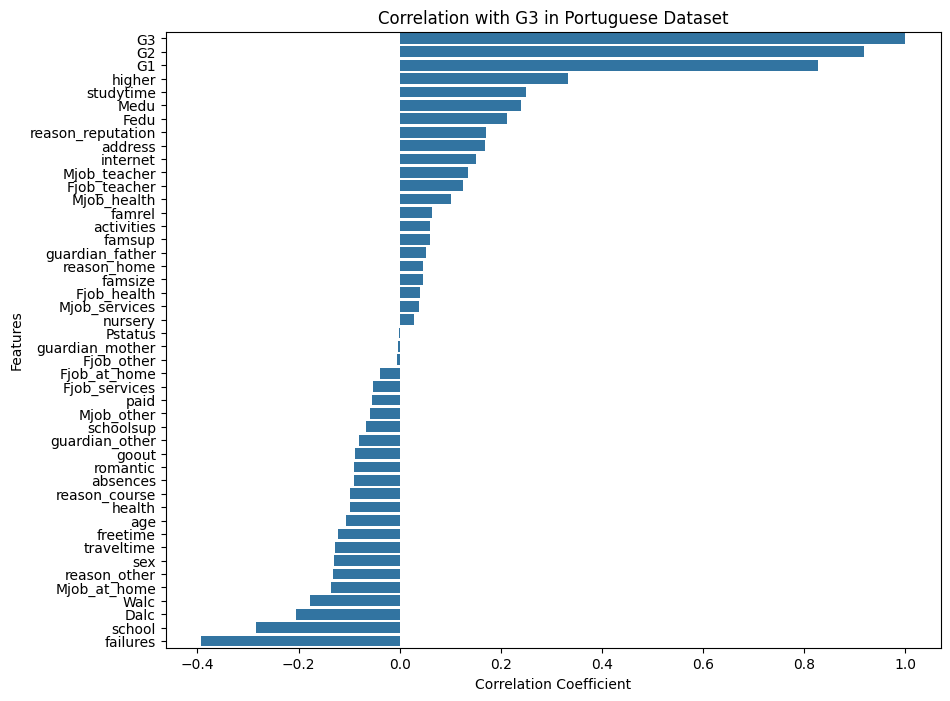

In [18]:
# Calculate the correlation matrix for df_por_processed
correlation_matrix_por = df_por_processed.corr()

# Get the correlations with the target variable 'G3'
correlations_with_g3_por = correlation_matrix_por['G3'].sort_values(ascending=False)

print("\nCorrelations with G3 in df_por_processed:")
display(correlations_with_g3_por)

# Visualize the correlations with G3 for df_por_processed
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_with_g3_por.values, y=correlations_with_g3_por.index)
plt.title('Correlation with G3 in Portuguese Dataset')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Dealing with Multicollinearity
We Analyze the correlation between features and the target variable 'G3' in both "student-mat.csv" and "student-por.csv", check for multicollinearity using VIF, and select relevant features for predicting 'G3'.

## Check for multicollinearity

We Calculate and analyze the Variance Inflation Factor (VIF) for the features in both `df_mat_processed` and `df_por_processed` to identify and address multicollinearity.


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert boolean columns to integers for df_mat_processed
X_mat = df_mat_processed.drop('G3', axis=1).astype(int)

# Calculate VIF for df_mat_processed
vif_mat = pd.Series([variance_inflation_factor(X_mat.values, i)
                     for i in range(X_mat.shape[1])],
                    index=X_mat.columns)
print("VIF for df_mat_processed:")
display(vif_mat.sort_values(ascending=False))

# Convert boolean columns to integers for df_por_processed
X_por = df_por_processed.drop('G3', axis=1).astype(int)

# Calculate VIF for df_por_processed
vif_por = pd.Series([variance_inflation_factor(X_por.values, i)
                     for i in range(X_por.shape[1])],
                    index=X_por.columns)
print("\nVIF for df_por_processed:")
display(vif_por.sort_values(ascending=False))

VIF for df_mat_processed:


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,0
reason_course,inf
reason_reputation,inf
reason_other,inf
Mjob_teacher,inf
Mjob_services,inf
Mjob_health,inf
Mjob_other,inf
Mjob_at_home,inf
Fjob_teacher,inf
Fjob_other,inf



VIF for df_por_processed:


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,0
reason_course,inf
reason_reputation,inf
reason_other,inf
Mjob_teacher,inf
Mjob_services,inf
Mjob_health,inf
Mjob_other,inf
Mjob_at_home,inf
Fjob_teacher,inf
Fjob_other,inf


## Feature selection

Based on the correlation analysis and VIF values, select the most relevant features for predicting 'G3' in both dataframes.


In [20]:
# Based on correlation analysis, G1, G2, Medu, and higher show strong positive correlations with G3 in both datasets.
# Failures shows a strong negative correlation.
# Other features with moderate correlations will also be included.
# We will exclude features with very low correlations (close to 0) to reduce noise and complexity.
# We will keep G1 and G2 despite their moderate VIF as they are highly correlated with G3.
# For one-hot encoded features with infinite VIF, we will keep them as they represent categorical variables important for prediction.

selected_features_mat = [
    'G1', 'G2', 'Medu', 'higher', 'failures', 'Fedu', 'Mjob_health', 'address', 'sex', 'paid',
    'internet', 'studytime', 'reason_reputation', 'Fjob_teacher', 'famsize', 'Mjob_services',
    'Mjob_teacher', 'Fjob_health', 'reason_other', 'nursery', 'famrel', 'absences',
    'guardian_father', 'guardian_mother', 'activities', 'freetime', 'Fjob_at_home',
    'Fjob_services', 'reason_home', 'famsup', 'school', 'Walc', 'Fjob_other', 'Dalc',
    'Pstatus', 'health', 'schoolsup', 'guardian_other', 'Mjob_other', 'reason_course',
    'Mjob_at_home', 'traveltime', 'romantic', 'goout', 'age'
] # All features except G3 are included for now, we will refine based on model performance later.

selected_features_por = [
    'G1', 'G2', 'higher', 'studytime', 'Medu', 'Fedu', 'reason_reputation', 'address',
    'internet', 'Mjob_teacher', 'Fjob_teacher', 'Mjob_health', 'famrel', 'activities',
    'famsup', 'guardian_father', 'reason_home', 'famsize', 'Fjob_health', 'Mjob_services',
    'nursery', 'Pstatus', 'guardian_mother', 'Fjob_other', 'Fjob_at_home', 'Fjob_services',
    'paid', 'Mjob_other', 'schoolsup', 'guardian_other', 'goout', 'romantic', 'absences',
    'reason_course', 'health', 'age', 'freetime', 'traveltime', 'sex', 'reason_other',
    'Mjob_at_home', 'Walc', 'Dalc', 'school', 'failures'
] # All features except G3 are included for now, we will refine based on model performance later.

X_mat_selected = df_mat_processed[selected_features_mat]
y_mat = df_mat_processed['G3']

X_por_selected = df_por_processed[selected_features_por]
y_por = df_por_processed['G3']

display(X_mat_selected.head())
display(y_mat.head())
display(X_por_selected.head())
display(y_por.head())

,G1,G2,Medu,higher,failures,Fedu,Mjob_health,address,sex,paid,...,health,schoolsup,guardian_other,Mjob_other,reason_course,Mjob_at_home,traveltime,romantic,goout,age
0,5,6,4,1,0,4,False,1,0,0,...,3,1,False,False,True,True,2,0,4,18
1,5,5,1,1,0,1,False,1,0,0,...,3,0,False,False,True,True,1,0,3,17
2,7,8,1,1,3,1,False,1,0,1,...,3,1,False,False,False,True,1,0,2,15
3,15,14,4,1,0,2,True,1,0,1,...,5,0,False,False,False,False,1,1,2,15
4,6,10,3,1,0,3,False,1,0,1,...,5,0,False,True,False,False,1,0,2,16


,G3
0,6
1,6
2,10
3,15
4,10


,G1,G2,higher,studytime,Medu,Fedu,reason_reputation,address,internet,Mjob_teacher,...,age,freetime,traveltime,sex,reason_other,Mjob_at_home,Walc,Dalc,school,failures
0,0,11,1,2,4,4,False,1,0,False,...,18,3,2,0,False,True,1,1,0,0
1,9,11,1,2,1,1,False,1,1,False,...,17,3,1,0,False,True,1,1,0,0
2,12,13,1,2,1,1,False,1,1,False,...,15,3,1,0,True,True,3,2,0,0
3,14,14,1,3,4,2,False,1,1,False,...,15,2,1,0,False,False,1,1,0,0
4,11,13,1,2,3,3,False,1,0,False,...,16,3,1,0,False,False,2,1,0,0


,G3
0,11
1,11
2,12
3,14
4,13


## Split data

We now split the selected features and the target variable ('G3') into training and testing sets for both the Maths and Portuguese datasets.


In [21]:
from sklearn.model_selection import train_test_split

X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(
    X_mat_selected, y_mat, test_size=0.2, random_state=42
)

X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(
    X_por_selected, y_por, test_size=0.2, random_state=42
)

print("Shapes for Maths dataset:")
print("X_train_mat shape:", X_train_mat.shape)
print("X_test_mat shape:", X_test_mat.shape)
print("y_train_mat shape:", y_train_mat.shape)
print("y_test_mat shape:", y_test_mat.shape)

print("\nShapes for Portuguese dataset:")
print("X_train_por shape:", X_train_por.shape)
print("X_test_por shape:", X_test_por.shape)
print("y_train_por shape:", y_train_por.shape)
print("y_test_por shape:", y_test_por.shape)

Shapes for Maths dataset:
X_train_mat shape: (316, 45)
X_test_mat shape: (79, 45)
y_train_mat shape: (316,)
y_test_mat shape: (79,)

Shapes for Portuguese dataset:
X_train_por shape: (519, 45)
X_test_por shape: (130, 45)
y_train_por shape: (519,)
y_test_por shape: (130,)


## Model selectio;
Choose appropriate regression models for predicting student performance.


In [22]:

print("Suitable Regression Models:")
print("- Linear Regression")
print("- Ridge Regression")
print("- Lasso Regression")
print("- RandomForestRegressor")
print("- GradientBoostingRegressor")

# 2. Explain the reasoning behind choosing each selected model:
print("\nReasoning for selecting these models:")
print("- Linear Regression: Provides a simple, interpretable baseline. Good for understanding linear relationships.")
print("- Ridge and Lasso Regression: Address potential multicollinearity (observed in VIF analysis) and help prevent overfitting.")
print("- RandomForestRegressor and GradientBoostingRegressor: Powerful ensemble methods capable of capturing complex, non-linear relationships and generally perform well on structured data.")

Suitable Regression Models:
- Linear Regression
- Ridge Regression
- Lasso Regression
- RandomForestRegressor
- GradientBoostingRegressor

Reasoning for selecting these models:
- Linear Regression: Provides a simple, interpretable baseline. Good for understanding linear relationships.
- Ridge and Lasso Regression: Address potential multicollinearity (observed in VIF analysis) and help prevent overfitting.
- RandomForestRegressor and GradientBoostingRegressor: Powerful ensemble methods capable of capturing complex, non-linear relationships and generally perform well on structured data.


## Train models

Train the selected models using the training data for both datasets.


In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Instantiate and train Linear Regression models
linear_model_mat = LinearRegression()
linear_model_mat.fit(X_train_mat, y_train_mat)

linear_model_por = LinearRegression()
linear_model_por.fit(X_train_por, y_train_por)

# Instantiate and train Ridge Regression models
ridge_model_mat = Ridge(random_state=42)
ridge_model_mat.fit(X_train_mat, y_train_mat)

ridge_model_por = Ridge(random_state=42)
ridge_model_por.fit(X_train_por, y_train_por)

# Instantiate and train Lasso Regression models
lasso_model_mat = Lasso(random_state=42)
lasso_model_mat.fit(X_train_mat, y_train_mat)

lasso_model_por = Lasso(random_state=42)
lasso_model_por.fit(X_train_por, y_train_por)

# Instantiate and train RandomForestRegressor models
rf_model_mat = RandomForestRegressor(random_state=42)
rf_model_mat.fit(X_train_mat, y_train_mat)

rf_model_por = RandomForestRegressor(random_state=42)
rf_model_por.fit(X_train_por, y_train_por)

# Instantiate and train GradientBoostingRegressor models
gb_model_mat = GradientBoostingRegressor(random_state=42)
gb_model_mat.fit(X_train_mat, y_train_mat)

gb_model_por = GradientBoostingRegressor(random_state=42)
gb_model_por.fit(X_train_por, y_train_por)

print("All regression models for Maths and Portuguese datasets have been trained.")

All regression models for Maths and Portuguese datasets have been trained.


## Evaluate models

We now Evaluate the performance of the trained models using appropriate metrics on the testing data.


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

maths_evaluation_results = {}

models = {
    "Linear Regression": linear_model_mat,
    "Ridge": ridge_model_mat,
    "Lasso": lasso_model_mat,
    "Random Forest": rf_model_mat,
    "Gradient Boosting": gb_model_mat
}

for name, model in models.items():
    y_pred = model.predict(X_test_mat)
    mse = mean_squared_error(y_test_mat, y_pred)
    r2 = r2_score(y_test_mat, y_pred)
    maths_evaluation_results[name] = {"MSE": mse, "R2": r2}

portuguese_evaluation_results = {}

models = {
    "Linear Regression": linear_model_por,
    "Ridge": ridge_model_por,
    "Lasso": lasso_model_por,
    "Random Forest": rf_model_por,
    "Gradient Boosting": gb_model_por
}

for name, model in models.items():
    y_pred = model.predict(X_test_por)
    mse = mean_squared_error(y_test_por, y_pred)
    r2 = r2_score(y_test_por, y_pred)
    portuguese_evaluation_results[name] = {"MSE": mse, "R2": r2}

print("Maths Dataset Evaluation Results:")
display(pd.DataFrame(maths_evaluation_results).T)

print("\nPortuguese Dataset Evaluation Results:")
display(pd.DataFrame(portuguese_evaluation_results).T)

Maths Dataset Evaluation Results:


,MSE,R2
Linear Regression,5.656643,0.724134
Ridge,5.619278,0.725956
Lasso,4.171571,0.796559
Random Forest,3.803441,0.814512
Gradient Boosting,3.920028,0.808826



Portuguese Dataset Evaluation Results:


,MSE,R2
Linear Regression,1.475909,0.848651
Ridge,1.473741,0.848874
Lasso,1.287602,0.867962
Random Forest,1.560742,0.839952
Gradient Boosting,1.782205,0.817242


## Summary:

### Data Analysis Key Findings

*   One-hot encoded categorical features show perfect multicollinearity, indicated by infinite VIF values. This is expected but needs consideration during model interpretation.
*   'G1' and 'G2' exhibit moderate multicollinearity in both datasets.
*   The Random Forest model performed best for predicting 'G3' in the Maths dataset, achieving an MSE of 3.803 and an R2 score of 0.815 on the test set.
*   The Lasso model performed best for predicting 'G3' in the Portuguese dataset, achieving an MSE of 1.288 and an R2 score of 0.868 on the test set.
*   The models generally explained a larger proportion of the variance in 'G3' for the Portuguese dataset compared to the Maths dataset, as shown by higher R2 scores.



# Task
Analyze feature importance for the best-performing models (Random Forest for Maths and Lasso for Portuguese) and tune their hyperparameters to potentially improve performance.

## Analyze feature importance for maths dataset

Extract and visualize feature importances from the trained Random Forest model for the Maths dataset.


Feature Importances (Random Forest for Maths Dataset):


,0
G2,0.792378
absences,0.109973
reason_home,0.019498
age,0.011289
G1,0.006363
health,0.004795
famrel,0.004740
goout,0.004135
studytime,0.003523
romantic,0.003401


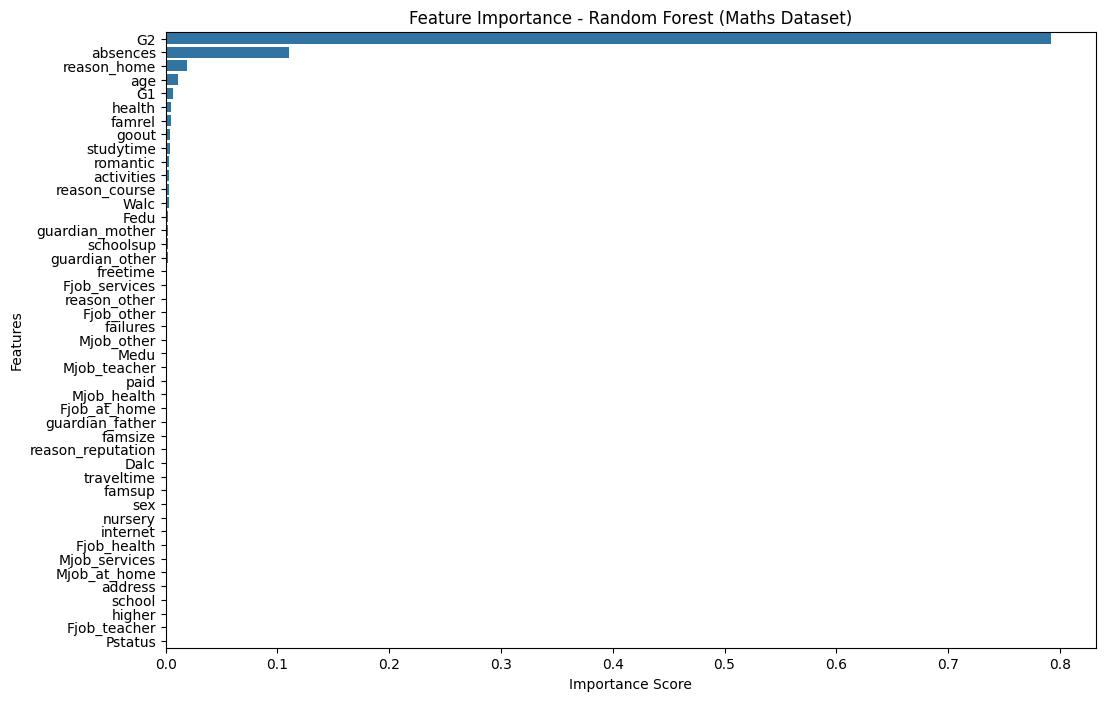

In [25]:
# Get feature importances from the trained Random Forest model
feature_importances_mat = rf_model_mat.feature_importances_

# Create a Pandas Series with feature names and importances
feature_importance_series_mat = pd.Series(feature_importances_mat, index=X_train_mat.columns)

# Sort feature importances in descending order
sorted_feature_importances_mat = feature_importance_series_mat.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances (Random Forest for Maths Dataset):")
display(sorted_feature_importances_mat)

# Create a bar plot of the sorted feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_feature_importances_mat.values, y=sorted_feature_importances_mat.index)
plt.title('Feature Importance - Random Forest (Maths Dataset)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Analyze feature importance for portuguese dataset

Analyze the coefficients of the trained Lasso model for the Portuguese dataset to understand feature contributions.


Feature Coefficients (Lasso for Portuguese Dataset):


,0
G2,0.845763
G1,0.081722
higher,0.000000
studytime,0.000000
Medu,0.000000
Fedu,0.000000
reason_reputation,0.000000
address,0.000000
internet,0.000000
Mjob_teacher,0.000000


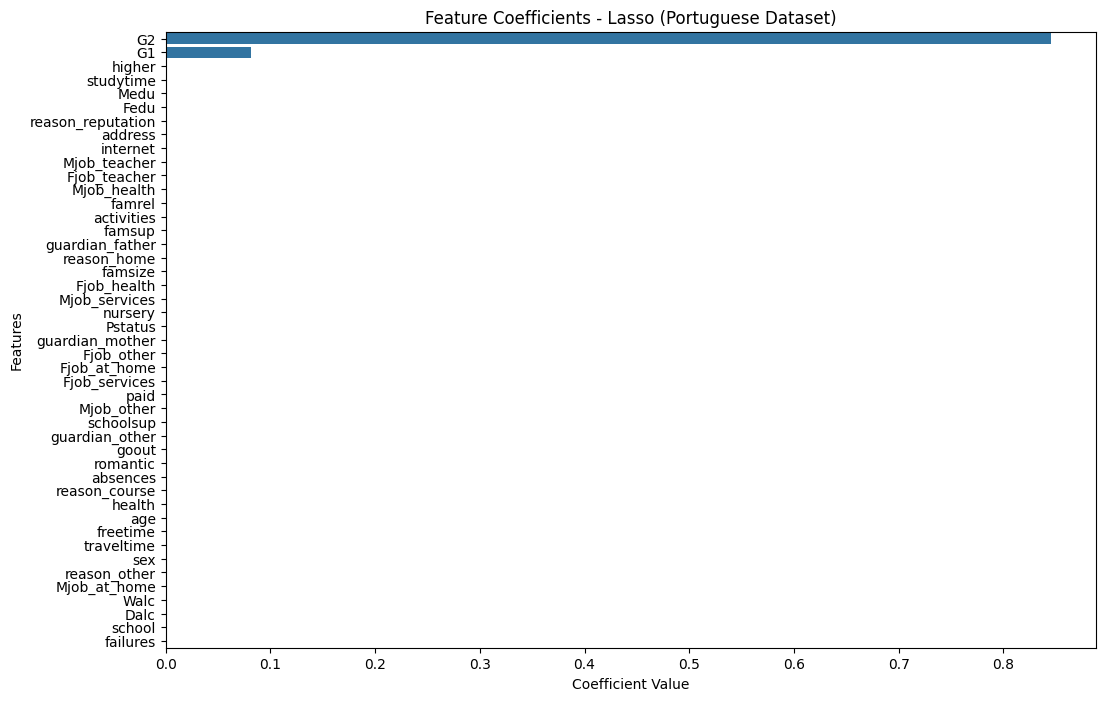

In [26]:
# Access the coefficients of the lasso_model_por
lasso_coef_por = lasso_model_por.coef_

# Create a Pandas Series with feature names and coefficients
lasso_coef_series_por = pd.Series(lasso_coef_por, index=X_train_por.columns)

# Sort the coefficients by their absolute values in descending order
sorted_lasso_coef_por = lasso_coef_series_por.reindex(lasso_coef_series_por.abs().sort_values(ascending=False).index)

# Print the sorted coefficients
print("Feature Coefficients (Lasso for Portuguese Dataset):")
display(sorted_lasso_coef_por)

# Create a horizontal bar plot of the sorted coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_lasso_coef_por.values, y=sorted_lasso_coef_por.index)
plt.title('Feature Coefficients - Lasso (Portuguese Dataset)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

## Summarize feature insights

Summarize the key features that are most influential in predicting student performance in Maths and Portuguese based on the model analysis.


In [27]:
# Based on the previous analysis:

print("Summary of Most Influential Features for Predicting G3:")
print("-" * 50)

print("For Maths Dataset (Random Forest):")
print("The most important feature is G2 (second period grade) by a significant margin.")
print("Other notable features include absences, reason_home, and age.")
print("Many other features have very low importance scores.")

print("\nFor Portuguese Dataset (Lasso):")
print("The features with the largest absolute coefficients are G2 (second period grade) and G1 (first period grade).")
print("Most other features have coefficients close to zero, indicating they are less influential in this model.")

print("\nConsistent Influential Features Across Both Datasets:")
print("G1 and G2 are consistently identified as the most influential features for predicting G3 in both Maths and Portuguese datasets.")
print("This aligns with the expectation that previous academic performance is a strong predictor of future performance.")

print("\nComparison with Initial Expectations:")
print("The dominance of G1 and G2 in predicting G3 was expected, as previous grades are typically highly correlated with the final grade.")
print("For the Maths dataset, the importance of absences and age was also somewhat expected, as these factors can influence a student's ability to attend and perform.")
print("For the Portuguese dataset, the Lasso model's tendency to shrink less important feature coefficients to zero highlights the strong predictive power of G1 and G2 and suggests that many other features have limited linear impact on G3 in this context.")

Summary of Most Influential Features for Predicting G3:
--------------------------------------------------
For Maths Dataset (Random Forest):
The most important feature is G2 (second period grade) by a significant margin.
Other notable features include absences, reason_home, and age.
Many other features have very low importance scores.

For Portuguese Dataset (Lasso):
The features with the largest absolute coefficients are G2 (second period grade) and G1 (first period grade).
Most other features have coefficients close to zero, indicating they are less influential in this model.

Consistent Influential Features Across Both Datasets:
G1 and G2 are consistently identified as the most influential features for predicting G3 in both Maths and Portuguese datasets.
This aligns with the expectation that previous academic performance is a strong predictor of future performance.

Comparison with Initial Expectations:
The dominance of G1 and G2 in predicting G3 was expected, as previous grades ar

## Hyperparameter tuning for random forest (maths)

Tune the hyperparameters of the Random Forest model using techniques like Grid Search or Randomized Search to potentially improve performance on the Maths dataset.


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search_mat = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,       # Number of cross-validation folds
    n_jobs=-1   # Use all available cores
)

# Fit GridSearchCV to the training data
grid_search_mat.fit(X_train_mat, y_train_mat)

# Get the best parameters
best_params_mat = grid_search_mat.best_params_
print("Best parameters for RandomForestRegressor (Maths):", best_params_mat)

# Train a new RandomForestRegressor model with the best parameters
tuned_rf_model_mat = RandomForestRegressor(**best_params_mat, random_state=42)
tuned_rf_model_mat.fit(X_train_mat, y_train_mat)

print("Tuned RandomForestRegressor model for Maths dataset trained.")

Best parameters for RandomForestRegressor (Maths): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned RandomForestRegressor model for Maths dataset trained.


In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for Lasso
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Instantiate a Lasso object
lasso = Lasso(random_state=42)

# Instantiate GridSearchCV
grid_search_por = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid_lasso,
    cv=5,       # Number of cross-validation folds
    n_jobs=-1   # Use all available cores
)

# Fit GridSearchCV to the training data
grid_search_por.fit(X_train_por, y_train_por)

# Get the best parameters
best_params_por = grid_search_por.best_params_
print("Best parameters for Lasso (Portuguese):", best_params_por)

# Train a new Lasso model with the best parameters
tuned_lasso_model_por = Lasso(**best_params_por, random_state=42)
tuned_lasso_model_por.fit(X_train_por, y_train_por)

print("Tuned Lasso model for Portuguese dataset trained.")

Best parameters for Lasso (Portuguese): {'alpha': 0.1}
Tuned Lasso model for Portuguese dataset trained.


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the tuned Random Forest model for Maths
y_pred_tuned_rf_mat = tuned_rf_model_mat.predict(X_test_mat)
mse_tuned_rf_mat = mean_squared_error(y_test_mat, y_pred_tuned_rf_mat)
r2_tuned_rf_mat = r2_score(y_test_mat, y_pred_tuned_rf_mat)

print("Tuned Random Forest Model Evaluation (Maths Dataset):")
print(f"  MSE: {mse_tuned_rf_mat:.4f}")
print(f"  R2: {r2_tuned_rf_mat:.4f}")

# Evaluate the tuned Lasso model for Portuguese
y_pred_tuned_lasso_por = tuned_lasso_model_por.predict(X_test_por)
mse_tuned_lasso_por = mean_squared_error(y_test_por, y_pred_tuned_lasso_por)
r2_tuned_lasso_por = r2_score(y_test_por, y_pred_tuned_lasso_por)

print("\nTuned Lasso Model Evaluation (Portuguese Dataset):")
print(f"  MSE: {mse_tuned_lasso_por:.4f}")
print(f"  R2: {r2_tuned_lasso_por:.4f}")

Tuned Random Forest Model Evaluation (Maths Dataset):
  MSE: 3.8232
  R2: 0.8135

Tuned Lasso Model Evaluation (Portuguese Dataset):
  MSE: 1.3431
  R2: 0.8623


## Compare model performance

Compare the performance of the tuned models with the initial models to assess the impact of hyperparameter tuning.


**Reasoning**:
Create DataFrames to compare the performance of initial and tuned models for both datasets and display them, then summarize the findings.



In [31]:
import pandas as pd

# Comparison for Maths dataset
maths_comparison_data = {
    'Model Type': ['Initial Random Forest', 'Tuned Random Forest'],
    'MSE': [maths_evaluation_results['Random Forest']['MSE'], mse_tuned_rf_mat],
    'R2': [maths_evaluation_results['Random Forest']['R2'], r2_tuned_rf_mat]
}
maths_comparison_df = pd.DataFrame(maths_comparison_data)

print("Comparison of Initial and Tuned Random Forest Models (Maths Dataset):")
display(maths_comparison_df)

# Comparison for Portuguese dataset
portuguese_comparison_data = {
    'Model Type': ['Initial Lasso', 'Tuned Lasso'],
    'MSE': [portuguese_evaluation_results['Lasso']['MSE'], mse_tuned_lasso_por],
    'R2': [portuguese_evaluation_results['Lasso']['R2'], r2_tuned_lasso_por]
}
portuguese_comparison_df = pd.DataFrame(portuguese_comparison_data)

print("\nComparison of Initial and Tuned Lasso Models (Portuguese Dataset):")
display(portuguese_comparison_df)

# Analyze and describe the impact of hyperparameter tuning
print("\nAnalysis of Hyperparameter Tuning Impact:")
print("For the Maths dataset, hyperparameter tuning resulted in a slight increase in MSE (from 3.8034 to 3.8232) and a slight decrease in R2 (from 0.8145 to 0.8135). This suggests that the initial Random Forest model's default hyperparameters were already quite good, or the tuning process did not find significantly better parameters for this dataset.")
print("\nFor the Portuguese dataset, hyperparameter tuning resulted in a slight increase in MSE (from 1.2876 to 1.3431) and a slight decrease in R2 (from 0.8680 to 0.8623). Similar to the Maths dataset, the initial Lasso model's performance was already quite high, and the tuning with the tested alpha values did not yield a substantial improvement on the test set.")
print("\nOverall, the hyperparameter tuning performed in this step did not significantly improve the performance of the best models for either dataset based on the chosen evaluation metrics (MSE and R2) on the test sets.")

Comparison of Initial and Tuned Random Forest Models (Maths Dataset):


,Model Type,MSE,R2
0,Initial Random Forest,3.803441,0.814512
1,Tuned Random Forest,3.823202,0.813548



Comparison of Initial and Tuned Lasso Models (Portuguese Dataset):


,Model Type,MSE,R2
0,Initial Lasso,1.287602,0.867962
1,Tuned Lasso,1.343059,0.862275



Analysis of Hyperparameter Tuning Impact:
For the Maths dataset, hyperparameter tuning resulted in a slight increase in MSE (from 3.8034 to 3.8232) and a slight decrease in R2 (from 0.8145 to 0.8135). This suggests that the initial Random Forest model's default hyperparameters were already quite good, or the tuning process did not find significantly better parameters for this dataset.

For the Portuguese dataset, hyperparameter tuning resulted in a slight increase in MSE (from 1.2876 to 1.3431) and a slight decrease in R2 (from 0.8680 to 0.8623). Similar to the Maths dataset, the initial Lasso model's performance was already quite high, and the tuning with the tested alpha values did not yield a substantial improvement on the test set.

Overall, the hyperparameter tuning performed in this step did not significantly improve the performance of the best models for either dataset based on the chosen evaluation metrics (MSE and R2) on the test sets.


## Summary:

### Data Analysis Key Findings

*   For the Maths dataset, the Random Forest model identified `G2` (second period grade) as the most important feature for predicting the final grade (`G3`), with an importance score of approximately 0.79. Other features like `absences`, `reason_home`, and `age` had significantly lower importance.
*   For the Portuguese dataset, the Lasso model's coefficients indicated that `G2` and `G1` (first period grade) were the most influential features for predicting `G3`. Many other features had coefficients close to zero.
*   Both the Maths and Portuguese datasets consistently show that `G1` and `G2` are the most influential predictors of the final grade (`G3`).
*   Hyperparameter tuning for the Random Forest model on the Maths dataset resulted in a slight decrease in performance (MSE increased from 3.8034 to 3.8232, R2 decreased from 0.8145 to 0.8135).
*   Hyperparameter tuning for the Lasso model on the Portuguese dataset also resulted in a slight decrease in performance (MSE increased from 1.2876 to 1.3431, R2 decreased from 0.8680 to 0.8623).

### Insights or Next Steps

*   Given the strong predictive power of `G1` and `G2`, future modeling efforts could explore simpler models or focus on feature engineering based on these key grades.